<div style="float:right;padding-top:20px">
   <img src="https://github.com/boudjelaba/Utiles/blob/main/Logo/Carnus_1.png?raw=true" style="width:80px"/>   
</div>

Carnus - K. Boudjelaba

# Signaux numériques


---

### Table des matières :

* <a href="#GSN">Génération de signaux numériques : </a>
* <a href="#NUS">Numériser un signal : </a>
    * <a href="#ECH">Echantillonnage : </a>
        * <a href="#RDS">Repliement de spectre (aliasing) : </a>
        * <a href="#IFE">Influence de la fréquence d'échantillonnage sur les signaux audio : </a>
    * <a href="#QUA">Quantification : </a>
        * <a href="#CEQ">Caractérisation de l'erreur de quantification : </a>
        * <a href="#IQS">Influence de la quantification sur les signaux audio : </a>
    * <a href="#EXP">Génération de séquences exponentielles : </a>
* <a href="#CONV">Convolution - Filtrage numérique : </a>
* <a href="#CAN">CAN 12 bits : </a>


---

<a id="GSN"></a>

## Génération de signaux numériques :

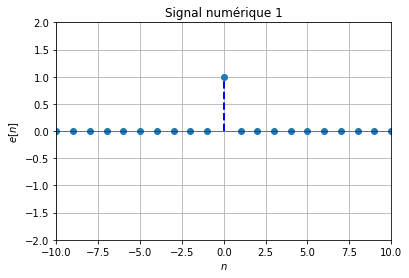

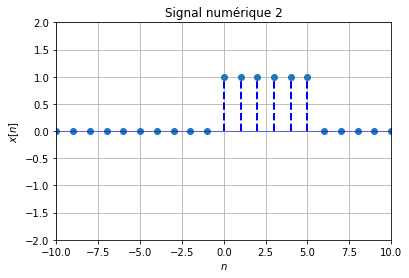

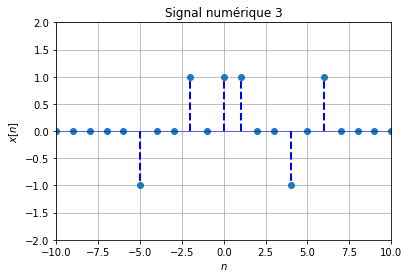

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def delta(n):
    if n == 0:
        return 1
    else:
        return 0

e_ = []
x_ = []
y_ = []
n = 10

for i in range(-n,n+1):
    e = delta(i)
    e_.append(e)

for i in range(-n,n+1):
    x = delta(i) + delta(i-1) + delta(i-2) + delta(i-3) + delta(i-4) + delta(i-5)
    x_.append(x)

for i in range(-n,n+1):
    y = - delta(i+5) + delta(i+2) + delta(i) + delta(i-1) - delta(i-4) + delta(i-6)
    y_.append(y)

plt.figure(1)
markerline, stemlines, baseline = plt.stem(range(-n,n+1),e_, '--',use_line_collection=True)
plt.setp(stemlines, 'color', 'b', 'linewidth', 2)
plt.setp(baseline, 'color', 'b', 'linewidth', 0.5)
plt.ylim([-2,2])
plt.xlim([-n,n])
plt.xlabel('$n$')
plt.ylabel('$e[n]$')
plt.title('Sig 1')
plt.grid(True)

plt.figure(2)
markerline, stemlines, baseline = plt.stem(range(-n,n+1),x_, '--',use_line_collection=True)
plt.setp(stemlines, 'color', 'b', 'linewidth', 2)
plt.setp(baseline, 'color', 'b', 'linewidth', 0.5)
plt.ylim([-2,2])
plt.xlim([-n,n])
plt.xlabel('$n$')
plt.ylabel('$x[n]$')
plt.title('Sig 2')
plt.grid(True)

plt.figure(3)
markerline, stemlines, baseline = plt.stem(range(-n,n+1),y_, '--',use_line_collection=True)
plt.setp(stemlines, 'color', 'b', 'linewidth', 2)
plt.setp(baseline, 'color', 'b', 'linewidth', 0.5)
plt.ylim([-2,2])
plt.xlim([-n,n])
plt.xlabel('$n$')
plt.ylabel('$x[n]$')
plt.title('Sig 3')
plt.grid(True)

plt.show()

---
### Exercice :

Sous Python, calculer le produit de convolution entre :

- Le signal Sig1 et Sig2
- Le signal Sig1 et Sig3
- Le signal Sig2 et Sig3

Calculer sur une feuille le produit de convolution entre le signal Sig2 et Sig2; vérifier les résultats sous Python.

---

<a id="NUS"></a>

## Numériser un signal :
La plupart des signaux dans la vie courante sont continus : tension fournie par un capteur, par un GBF ... Cependant, pour que les ordinateurs puissent traiter ces signaux continus, ils doivent être convertis en représentations numériques via un convertisseur analogique-numérique (CAN). Un signal numérique est différent du signal continu (deux différences principales) :

- Il est échantillonné à des pas de temps spécifiques. Par exemple, le son est souvent échantillonné à 44,1 kHz (ou une fois toutes les 0,023 ms).
- Il est quantifié à des niveaux de tension spécifiques. Par exemple, sur l'Arduino Uno, le microcontrôleur a un CAN 10 bits, donc une tension continue d'entrée peut être discrétisée par un pas $\dfrac{5𝑉}{2^{10}} = 4.88 𝑚𝑉$.

---
<a id="ECH"></a>

### Echantillonnage
Pour enregistrer un signal dans un format numérique (échantillonner le signal), on mesure ses valeurs à des instants $t_i$ bien précis $i\in[0,N-1]$. Dans ce cas, on enregistre $N$ valeurs du signal; par conséquent, on perd une quantité d'information.   
La fréquence d'échantillonnage est définie par : $f_e=\frac{N-1}{D}$ avec $D$ : la durée d'observation du signal.

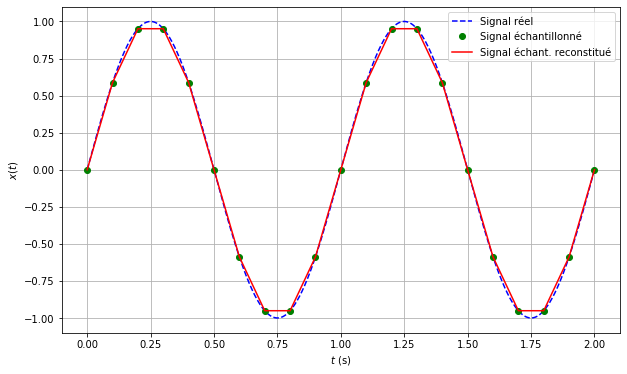

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Signal sinusoïdal
T = 1.
def signal(t): 
    return np.sin(2. * np.pi * t / T)

# Echantillonnage du signal sinusoïdal
D = 2. # Duree d'observation
fe = 10. # Frequence d'échantillonnage
N = int(D * fe) + 1 # Nombre de points enregistrés
te = np.linspace(0., (N-1)/fe, N) # Grille d'échantillonnage
tp = np.linspace(0., D, 1000) # Grille plus fine pour tracer l'allure du signal parfait

plt.figure(figsize=(10,6))
plt.plot(tp, signal(tp), 'b--', label = u"Signal réel")
plt.plot(te, signal(te),'go', label = u"Signal échantillonné")
plt.plot(te, signal(te), 'r-', label = u"Signal échant. reconstitué")
plt.xlabel("$t$ (s)")
plt.ylabel("$x(t)$")
plt.grid()
plt.legend()
plt.show()

---
<a id="RDS"></a>

### Repliement de spectre (aliasing) :

On va échantillonner quatre signaux à une fréquence d'échantillonnage de 50 Hz :     
signal1 = 5Hz, signal2 = 10Hz, signal3 = 20Hz et signal4 = 60Hz. 
Le signal "signal4" ne respecte pas la condition de Nyquist, qui est $\frac{1}{2} ∗ 50𝐻𝑧 = 25𝐻𝑧$

Les "échantillons" sont représentés par des lignes verticales avec des marqueurs rectangulaires carrés.
- Qu'observez-vous ? Faites très attention au signal4.

Fréquence d'échantillonnage : 50 Hz


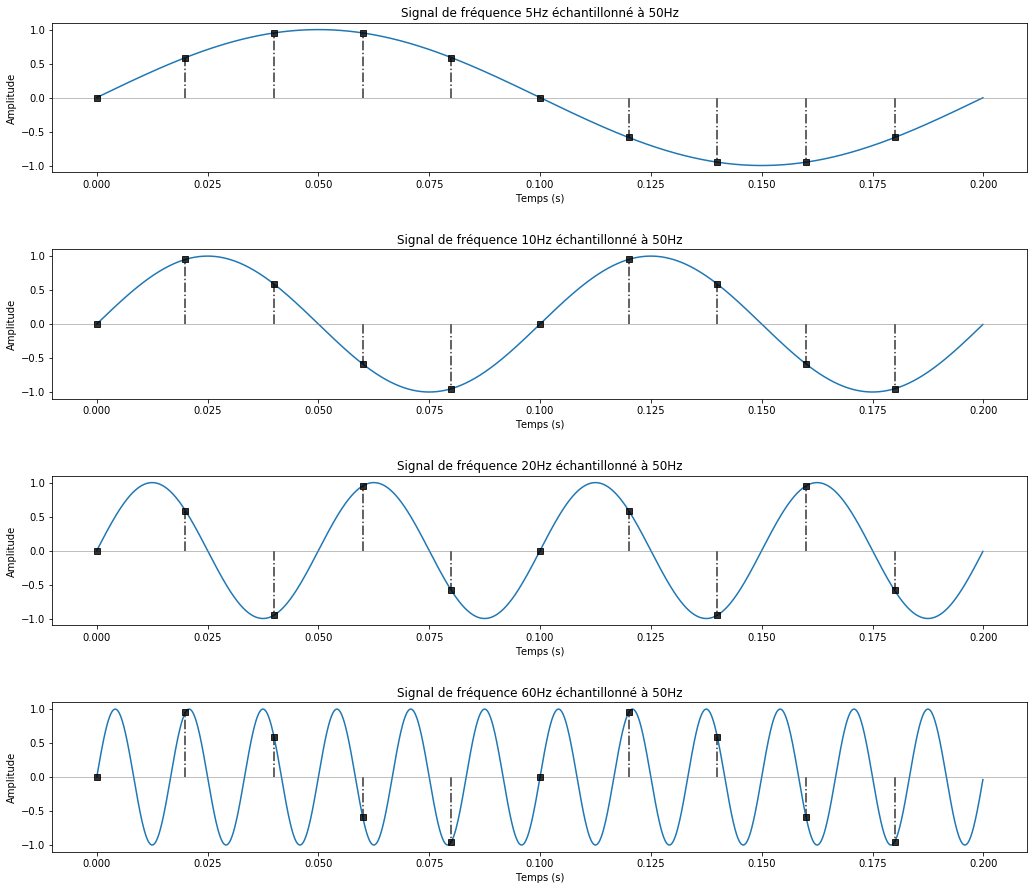

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

duree = 0.2

FE = 10000
t = np.arange(0,duree,1/FE)

signal1_freq = 5
signal1 = np.sin(2*np.pi*signal1_freq*t)

signal2_freq = 10
signal2 = np.sin(2*np.pi*signal2_freq*t)

signal3_freq = 20
signal3 = np.sin(2*np.pi*signal3_freq*t)

signal4_freq = 60
signal4 = np.sin(2*np.pi*signal4_freq*t)

# Creation de la version échantillonnée de ces signaux continus
fe = 50 # doit être un nombre entier
td = np.arange(0,duree,1/fe)

signal1_ech = np.sin(2*np.pi*signal1_freq*td)
signal2_ech = np.sin(2*np.pi*signal2_freq*td)
signal3_ech = np.sin(2*np.pi*signal3_freq*td)
signal4_ech = np.sin(2*np.pi*signal4_freq*td)

print(f"Fréquence d'échantillonnage : {fe} Hz")

# Visualisation des signaux échantillonnés
fig, axes = plt.subplots(4, 1, figsize=(15,13))
axes[0].plot(t, signal1)
axes[0].axhline(0, color="gray", linestyle="-", linewidth=0.5)
axes[0].plot(td, signal1_ech, linestyle='None', alpha=0.8, marker='s', color='black')
axes[0].vlines(td, ymin=0, ymax=signal1_ech, linestyle='-.', alpha=0.8, color='black')
axes[0].set_ylabel("Amplitude")
axes[0].set_xlabel("Temps (s)")
axes[0].set_title(f"Signal de fréquence {signal1_freq}Hz échantillonné à {fe}Hz")

axes[1].plot(t, signal2)
axes[1].axhline(0, color="gray", linestyle="-", linewidth=0.5)
axes[1].plot(td, signal2_ech, linestyle='None', alpha=0.8, marker='s', color='black')
axes[1].vlines(td, ymin=0, ymax=signal2_ech, linestyle='-.', alpha=0.8, color='black')
axes[1].set_ylabel("Amplitude")
axes[1].set_xlabel("Temps (s)")
axes[1].set_title(f"Signal de fréquence {signal2_freq}Hz échantillonné à {fe}Hz")

axes[2].plot(t, signal3)
axes[2].axhline(0, color="gray", linestyle="-", linewidth=0.5)
axes[2].plot(td, signal3_ech, linestyle='None', alpha=0.8, marker='s', color='black')
axes[2].vlines(td, ymin=0, ymax=signal3_ech, linestyle='-.', alpha=0.8, color='black')
axes[2].set_ylabel("Amplitude")
axes[2].set_xlabel("Temps (s)")
axes[2].set_title(f"Signal de fréquence {signal3_freq}Hz échantillonné à {fe}Hz")

axes[3].plot(t, signal4)
axes[3].axhline(0, color="gray", linestyle="-", linewidth=0.5)
axes[3].plot(td, signal4_ech, linestyle='None', alpha=0.8, marker='s', color='black')
axes[3].vlines(td, ymin=0, ymax=signal4_ech, linestyle='-.', alpha=0.8, color='black')
axes[3].set_ylabel("Amplitude")
axes[3].set_xlabel("Temps (s)")
axes[3].set_title(f"Signal de fréquence {signal4_freq}Hz échantillonné à {fe}Hz")

fig.tight_layout(pad = 3.0)

- Regardons de plus près le signal2 = 10 Hz et le signal 4 = 60Hz.

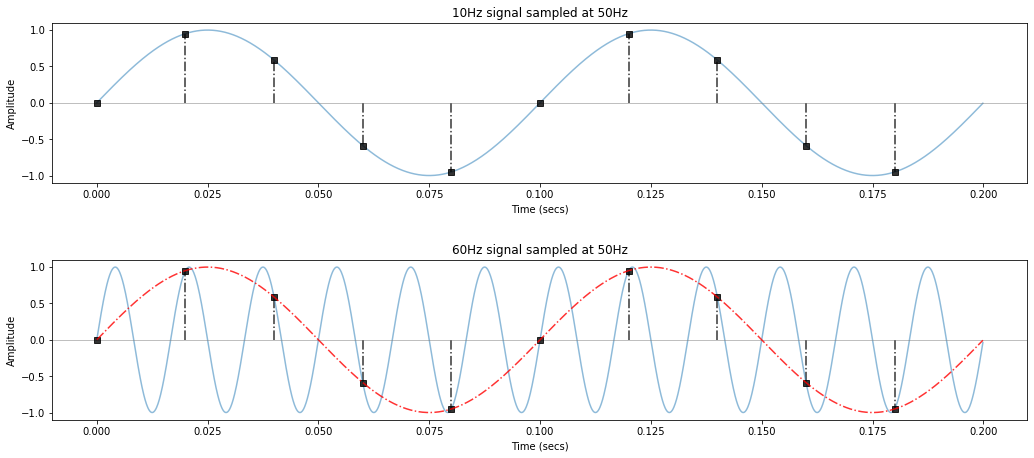

In [4]:
fig, axes = plt.subplots(2, 1, figsize=(15,7))

axes[0].plot(t, signal2, alpha=0.5)
axes[0].axhline(0, color="gray", linestyle="-", linewidth=0.5)
axes[0].plot(td, signal2_ech, linestyle='None', alpha=0.8, marker='s', color='black')
axes[0].vlines(td, ymin=0, ymax=signal2_ech, linestyle='-.', alpha=0.8, color='black')
axes[0].set_ylabel("Amplitude")
axes[0].set_xlabel("Time (secs)")
axes[0].set_title(f"{signal2_freq}Hz signal sampled at {fe}Hz")

axes[1].plot(t, signal4, alpha=0.5)
axes[1].axhline(0, color="gray", linestyle="-", linewidth=0.5)
axes[1].plot(td, signal4_ech, linestyle='None', alpha=0.8, marker='s', color='black')
axes[1].vlines(td, ymin=0, ymax=signal4_ech, linestyle='-.', alpha=0.8, color='black')
axes[1].plot(t, signal2, linestyle='-.', alpha=0.8, color='red')
axes[1].set_ylabel("Amplitude")
axes[1].set_xlabel("Time (secs)")
axes[1].set_title(f"{signal4_freq}Hz signal sampled at {fe}Hz")

fig.tight_layout(pad = 3.0)

Le signal 60Hz est replié (aliasé) à 10Hz. Et une fois que le signal est numérisé, il n'y aurait aucun moyen de faire la différence entre un signal réel à 10 Hz et un signal aliasé!

Au premier échantillon, les deux sinusoïdes ne font que commencer; pour l'échantillon suivant, la sinusoïde 60Hz a presque terminé une période complète!

La formule pour obtenir la fréquence aliasée est $|n*f_e-f|$ où $f_e$ est notre fréquence d'échantillonnage, $f$ est la fréquence du signal et $n$ est le multiple entier le plus proche de la fréquence d'échantillonnage, c-à-d $round(\dfrac{f}{f_e})$. 

In [8]:
# C'est plus simple à expliquer par un code
fe = 50
signal_freq = 110 # à tester avec différentes fréquences
entier_multiple_proche = round(signal_freq/fe)
freq_alias = abs(entier_multiple_proche*fe-signal_freq)

print(f"Fréquence réelle du signal : {signal_freq} Hz")
print(f"Fréquence d'échantillonnage : {fe} Hz")
print(f"Entier multiple le plus proche : {entier_multiple_proche}")
print(f"Fréquence aliasée : {freq_alias} Hz")

Fréquence réelle du signal : 80 Hz
Fréquence d'échantillonnage : 50 Hz
Entier multiple le plus proche : 2
Fréquence aliasée : 20 Hz


---
### Exercice :

Tracer le signal réel et échantillonné pour les signaux sinusoïdaux ayant les fréquences suivantes : (la fréquence d'échantillonnage est $fe=50$ Hz)

- f1=40 Hz, f2=90 Hz, f3=140 Hz

In [1]:
# Vous pouvez utiliser le programme "Code_KB" 
# ou le coder en s'inspirant des 2 exemples précédents


---
### Exercice :

Tracer le signal réel et échantillonné pour les signaux sinusoïdaux ayant les fréquences suivantes : (la fréquence d'échantillonnage est $fe=50$ Hz)

- f1=50 Hz, f2=100 Hz, f3=150 Hz

In [2]:
# Vous pouvez utiliser le programme "Code_KB" 
# ou le coder en s'inspirant des 2 exemples précédents


---

<a id="IFE"></a>

## Influence de la fréquence d'échantillonnage sur les signaux audio :

Dans cette partie, on utilisera des données audio comme signal principal. On a choisit le son car on peut à la fois visualiser et entendre le signal. On va tracer ces formes d'onde, les manipuler, puis les écouter. Il est nécessaire de brancher vos écouteurs afin que vous puissiez vraiment entendre les distinctions entre les différents échantillons audio.

16-bit audio
Fréquence d'échantillonnage : 44100 Hz
Nombre de canaux (voix) = 1
Nombre total d'échantillons : 169600


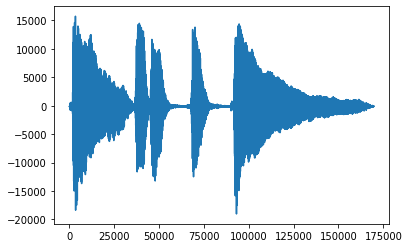

In [7]:
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np 
from IPython.display import (Audio, display, clear_output)
from scipy.io.wavfile import read
%matplotlib inline

fe, son_44100 = read('piano.wav')

n_bits = 16
print(f"{n_bits}-bit audio")
print(f"Fréquence d'échantillonnage : {fe} Hz")
print(f"Nombre de canaux (voix) = {len(son_44100.shape)}")
print(f"Nombre total d'échantillons : {son_44100.shape[0]}")

if len(son_44100.shape) == 2:
    print("Convertion audio stereo vers mono")
    son_44100 = son_44100.sum(axis=1) / 2

plt.figure()
plt.plot(son_44100)
plt.show()

ipd.Audio(son_44100, rate=fe)

Fréquence d'échatillonnage : 11025 Hz avec limite Nyquist 5512 Hz


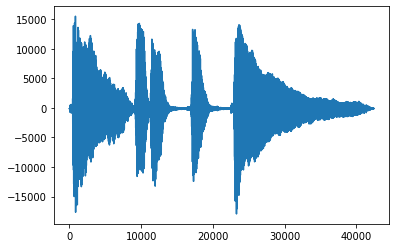

In [6]:
facteur = 4
fe2 = int(fe / facteur)
son_11025 = son_44100[::facteur]

print(f"Fréquence d'échatillonnage : {fe2} Hz avec limite Nyquist {int(fe2 / 2)} Hz")

plt.figure()
plt.plot(son_11025)
plt.show()

ipd.Audio(son_11025, rate=fe2)

---
### Exercice :

Tracer le signal audio et écouter ce signal pour $fe=4410$ Hz, puis $fe=2205$ Hz. Conclure sur la qualité du son et le graphe représentatnt l'échantillon audio.

In [ ]:
# fe = 4410 Hz


In [3]:
# fe = 2205 Hz


---
<a id="QUA"></a>

## Quantification

La quantification fait référence au processus de transformation d'un signal analogique, qui a un ensemble continu de valeurs, en un signal numérique, qui a un ensemble discret. Voir la figure ci-dessous.

<a id="CEQ"></a>

### Caractérisation de l'erreur de quantification

Un échantillon numérisé peut avoir une erreur maximale de la moitié de la taille du pas de discrétisation (c'est-à-dire ± la moitié du «bit le moins significatif» (LSB)). Pourquoi ? Parce que lorsque nous convertissons une valeur analogique en une valeur numérique, nous arrondissons à l'entier le plus proche. Considérons un signal de tension de 0,2271 V sur la broche d'entrée analogique d'un Arduino Uno, c'est presque à mi-chemin entre les étapes de 0,2246 V et 0,2295 V, ce qui entraînerait une erreur de $\frac{4.89𝑚𝑉}{2}$
(et soit converti en 47 ou 48 via analogRead d'Arduino).

---
### Quantification : Principe de conversion Analogique — Numérique (CAN) :


[<img src="Quant.png" width="700"/>](Quantification_CAN)

- CAN unipolaire :
$$N=2^n\dfrac{e}{PE} \; \text{ ou }\; N=2^n\dfrac{e}{PE}+0.5$$ 

- CAN bipolaire :
$$N=2^{n-1}\left(\dfrac{e}{PE}+1\right)$$ 

$PE$ : Pleine Echelle (Fulle Scale)    
$q=\dfrac{PE}{2^n}$ : Pas de quantification (Quantum)

---
### Quantification : Principe de conversion Numérique — Analogique (CNA) :


[<img src="Quant1.png" width="600"/>](Quantification_CNA)

- CAN unipolaire :
$$V_s=PE\dfrac{N}{2^n}$$ 

- CAN bipolaire :
$$N=PE\left(\dfrac{N}{2^{n-1}}-1\right)$$ 

$PE$ : Pleine Echelle (Fulle Scale)    
$q=\dfrac{PE}{2^n}$ : Pas de quantification (Quantum)

---

### Exemple :
- Convertir le signal analogique $s(t)=\sin(2\pi*10* t)$ en signal numérique. Le CAN est un convertisseur $4$ bits.
- Réaliser la conversion inverse (Numérique—Analogique) et comparer avec le signal original.

4-bit dans l'intervelle 0 à 15
Valeur Max : 16, Valeur Moy : 7.51


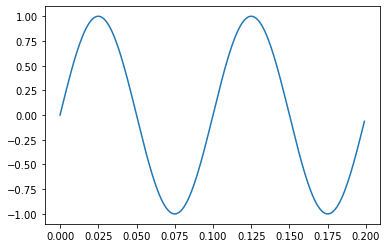

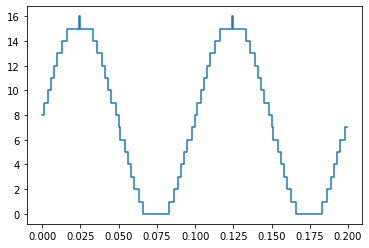

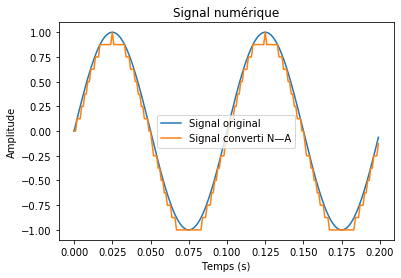

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 

f_e = 1000
t = np.arange(0,0.2,1/f_e)
data = np.sin(2*np.pi*10*t)

PE = 1
n_bits = 4
data_4bit = (2**(n_bits-1))*((data/PE)+1)
data_4bit = data_4bit.astype(int)

print(f"{n_bits}-bit dans l'intervelle {0} à {2**(n_bits ) - 1}")
print(f"Valeur Max : {np.max(data_4bit)}, Valeur Moy : {np.mean(data_4bit):.2f}")

plt.figure()
plt.plot(t,data)
plt.show()

plt.figure()
plt.step(t,data_4bit)
plt.show()


e_s = PE*(data_4bit/(2**(n_bits-1))-1)
plt.figure()
plt.plot(t,data, label='Signal original')
plt.plot(t,e_s, label='Signal converti N—A')
plt.title('Signal numérique')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

---
- Si on veut afficher sur l'axe des ordonnées le code binaire équivalent, on peut utiliser ce code.

4-bit dans l'intervelle 0 à 15
Valeur Max : 16, Valeur Moy : 7.51


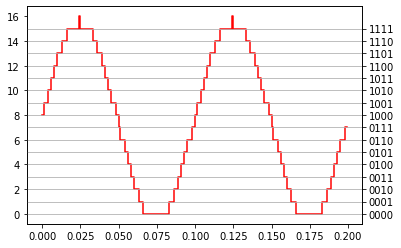

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 

f_e = 1000
t = np.arange(0,0.2,1/f_e)
data = np.sin(2*np.pi*10*t)

PE = 1
n_bits = 4
data_4bit = (2**(n_bits-1))*((data/PE)+1)
data_4bit = data_4bit.astype(int)

print(f"{n_bits}-bit dans l'intervelle {0} à {2**(n_bits ) - 1}")
print(f"Valeur Max : {np.max(data_4bit)}, Valeur Moy : {np.mean(data_4bit):.2f}")

def Dec_Bin(d):
    b = 0
    p = 0
    temp = d
    while(temp>0):
        b = ((temp%2)*(10**p)) + b
        temp = int(temp/2)
        p = p + 1
    return b

a = np.arange(0,16)
r = []
for i in range(len(a)):
    r.append(Dec_Bin(a[i]))

fig, ax1 = plt.subplots()
ax1.step(t,data_4bit, color='r')

ax2 = ax1.twinx()  
ax2.plot(t,data_4bit, color='None')  
ax2.tick_params(axis='y', labelcolor='k')
x=[]
for i in range(16):
    x.append('{:04d}'.format(r[i]))
ax2.set_yticks(np.arange(0,16))
ax2.set_yticklabels(x)
ax2.grid()

plt.show()

---

### Exercice :
- Convertir les signaux analogiques $s_1(t)=6+6\sin(2\pi t)$ et $s_2(t)=6\sin(2\pi t)$ en signaux numériques. Le CAN est un convertisseur $4$ bits.
- Réaliser la conversion inverse (Numérique—Analogique) et comparer avec les signaux originaux.

In [ ]:
# s1(t)


In [ ]:
# s2(t)


---
<a id="IQS"></a>

## Influence de la quantification sur les signaux audio :

Pour les exemples ci-dessous, nous travaillerons avec des formes d'onde audio pré-numérisées échantillonnées à 44,1 kHz et quantifiées à 16 bits. Donc, bien que ce ne soit pas un véritable échantillon continu, on le traitera comme tel. Et on va "sous-échantillonner" pour étudier les effets des niveaux de quantification et des taux d'échantillonnage.

Fréquence d'échantillonnage : 44100 Hz
Nombre de canaux (voix) = 1
Nombre total d'échantillons : 169600
Durée = 3.8458049886621315s
[-140 -140 -140 ... -126 -123 -126]
16-bits intervalle de -32768 à 32767
Valeur Max : 15732, Valeur Moy : -118.21


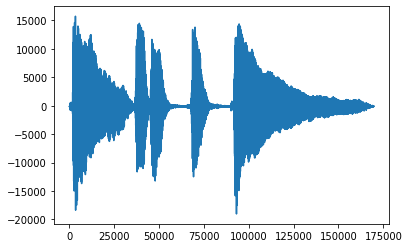

In [19]:
import IPython.display as ipd
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import signal
import random
from IPython.display import (Audio, display, clear_output)
from scipy.io.wavfile import read
%matplotlib inline

fe, data_16bit = read('piano.wav')

print(f"Fréquence d'échantillonnage : {fe} Hz")
print(f"Nombre de canaux (voix) = {len(data_16bit.shape)}")
print(f"Nombre total d'échantillons : {data_16bit.shape[0]}")    

duree_secs = data_16bit.shape[0] / fe
print(f"Durée = {duree_secs}s")
print(data_16bit)
n_bits = 16
print(f"{n_bits}-bits intervalle de -{2**(n_bits - 1)} à {2**(n_bits - 1) - 1}")
print(f"Valeur Max : {np.max(data_16bit)}, Valeur Moy : {np.mean(data_16bit):.2f}")

plt.figure()
plt.plot(data_16bit)
plt.show()

ipd.Audio(data_16bit, rate=fe)

[0 0 0 ... 0 0 0]
6-bits : intervalle audio ranges from -32 à 31
Valeur Max : 15, Valeur Moy : -0.07


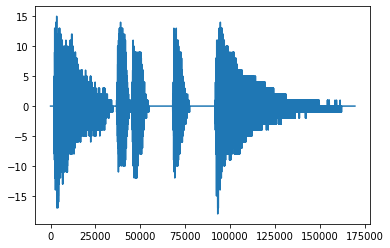

In [21]:
data_float = data_16bit / 2**16

n_bits = 6
data_6bit = data_float * 2**n_bits
data_6bit = data_6bit.astype(int)
print(data_6bit)
print(f"{n_bits}-bits : intervalle audio ranges from -{2**(n_bits - 1)} à {2**(n_bits - 1) - 1}")
print(f"Valeur Max : {np.max(data_6bit)}, Valeur Moy : {np.mean(data_6bit):.2f}")

plt.plot(data_6bit)
ipd.Audio(data_6bit, rate=fe)

---
### Exercice :

Tracer le signal audio et écouter ce signal pour un convertisseur $4$ bits puis $3$ bits. Conclure sur la qualité du son et le graphe représentatnt l'échantillon audio.

In [6]:
# CAN 4 bits


In [7]:
# CAN 3 bits


### Quantification Uniforme <a class="anchor" id="section_3_1"></a>

Considérons un intervalle bipolaire symétrique $I=[-x_{max}, x_{max}]$. En présence d'une quantification uniforme, l'ensemble $\mathcal{X}=\{x_0,\cdots,x_{2^L-1}\}$ est composé de valeurs de la forme $x_l = lq-x_{max}$ où  $l=0,1,\cdots, 2^L-1$ et $q$ correspond au pas de quantification.

<span class="badge badge-danger" style="color: #fff;background-color: #dc3545;"> Important</span>
<div class="alert alert-info">
    Le <b>pas de quantification</b> (également appelé quantum) est défini par
    $$q=\frac{2x_{max}}{2^L}$$
    
où $L$ est le nombre de bits de quantification
</div>

La résolution $R$ du numériseur s'exprime sous la forme :

$$R=\frac{q}{2x_{max}}=\frac{1}{2^L}$$

In [18]:
def X_set_uniform(L,xmax):
    q = 2*xmax/(2**L) # pas de quantification
    l = np.arange(0,2**L)
    X_set = l*q-xmax
    return X_set

xmax = 1 #valeur extreme de l'intervalle I
L = 3 # nombre de bit du numériseur.
X_set = X_set_uniform(L,xmax)

print("--- Ensemble X (L={}) ---".format(L))
for indice in range(len(X_set)):
    print("x_{}={}".format(indice,X_set[indice]))

--- Ensemble X (L=3) ---
x_0=-1.0
x_1=-0.75
x_2=-0.5
x_3=-0.25
x_4=0.0
x_5=0.25
x_6=0.5
x_7=0.75


In [19]:
def X_set_uniform(L,xmax):
    q = 2*xmax/(2**L-1) # pas de quantification
    l = np.arange(0,2**L)
    X_set = l*q-xmax
    return X_set

xmax = 1 #valeur extreme de l'intervalle I
L = 3 # nombre de bit du numériseur.
X_set = X_set_uniform(L,xmax)

print("--- Ensemble X (L={}) ---".format(L))
for indice in range(len(X_set)):
    print("x_{}={}".format(indice,X_set[indice]))

--- Ensemble X (L=3) ---
x_0=-1.0
x_1=-0.7142857142857143
x_2=-0.4285714285714286
x_3=-0.1428571428571429
x_4=0.1428571428571428
x_5=0.4285714285714284
x_6=0.7142857142857142
x_7=1.0


### Caractéristique de Quantification <a class="anchor" id="section_3_2"></a>

La caractéristique de quantification est la courbe donnant $\widehat{x}[n]=Q(x[n])$ en fonction de $x[n]$. Cette courbe selectionne une valeur parmi les $2^L$ valeurs de l'ensemble $\mathcal{X}$ de sorte à minimiser un critère de distance. Trois approches sont possibles :

* Approche 1 (**arrondi au plus proche voisin**): $x[n]$ est remplacée par la valeur de $\mathcal{X}$ la plus proche,
* Approche 2 : $x[n]$ est remplacée par la valeur de $\mathcal{X}$ immédiatement en dessous,
* Approche 3 : $x[n]$ est remplacée par la valeur de $\mathcal{X}$ immédiatement au-dessus.

A titre d'exemple, pour l'approche du plus proche voisin, le valeur de $\widehat{x}[n]$ s'exprime sous la forme (une autre formulation est disponible dans le polycopié)

$$\widehat{x}[n]=Q(x[n]) = \arg \min_{x\in \mathcal{X}} |x-x[n]|$$

La figure suivante présente la caractéristique de quantification obtenue avec les 3 approches pour une quantification de type uniforme.

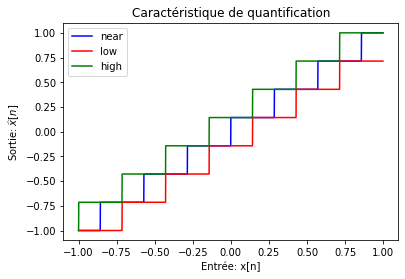

In [20]:
import numpy as np

def X_set_uniform(L,xmax):
    q = 2*xmax/(2**L-1) # pas de quantification
    l = np.arange(0,2**L)
    X_set = l*q-xmax
    return X_set

def Q(x,X_set,type="near"):
    x_est = []
    for x_temp in x:

        if type== "near":
            distance = np.abs(x_temp-X_set)
            
        if type == "low":
            distance = np.abs(x_temp-X_set)+10000*(x_temp<X_set) # add constraint
            
        if type == "high":
            distance = np.abs(x_temp-X_set)+10000*(x_temp>X_set) # add constraint
        
        index = distance.argmin()
        x_est_temp = X_set[index]
        x_est.append(x_est_temp)
    return x_est

##############################

x = np.arange(-xmax,xmax,0.001)
color_list = ["b-","r-","g-"]

for indice,type in enumerate(["near","low","high"]):
    x_est = Q(x,X_set,type=type)
    plt.plot(x,x_est,color_list[indice],label=type)

plt.xlabel("Entrée: x[n]")
plt.ylabel("Sortie: $\widehat{x}[n]$")
plt.legend()
plt.title("Caractéristique de quantification");

### Erreur (Bruit) de Quantification <a class="anchor" id="section_3_2"></a>

L’erreur de quantification (egalement appelée aussi bruit dequantification) est la différence entre $x[n]$ et $Q(x[n])$ c-a-d

$$e[n] = x[n] − Q(x[n])$$

Lors de la quantification, deux sortes d’erreur peuvent être commises : l’erreur de saturation et l’erreur de granulation.

* **Erreur de saturation** : Lorsque $|x[n]|>x_{max}$, l'erreur $e[n]$ est appelée erreur de saturation. Cette erreur n’est pas bornée.
* **Erreur de granulation** : Lorsque $|x[n]|\le x_{max}$, l'erreur $e[n]$ est appelée erreur de granulation. erreur est bornée. Si la quantification s’effectue par arrondi au plus proche voisin (approche 1), la valeur absolue de l'erreur de granulation $e[n]$ est inférieure à $q/2$ :

$$|e[n]|\le \frac{q}{2}=\frac{x_{max}}{2^L-1}$$

In [21]:
from ipywidgets import interact

def show_quantification_noise(L=3):
    xmax=1
    x = np.arange(-xmax,xmax,0.001)
    X_set = X_set_uniform(L,xmax)
    x_est = Q(x,X_set,type="near")
    e = x-x_est
    
    plt.figure()
    plt.plot(x,x_est,'b',label="original")
    plt.plot(x,x,'b--',label="quantifié")
    plt.plot(x,e,'r--',label="erreur")
    plt.hlines(-xmax/(2**L-1),-xmax,xmax,linestyles='dashed')
    plt.hlines(xmax/(2**L-1),-xmax,xmax,linestyles='dashed')
    plt.xlabel("Entrée: $x[n]$")
    plt.ylabel("Sortie: $\widehat{x}[n]$")
    plt.legend()
    
    plt.figure()
    t = np.arange(0,1,0.001)
    x = np.sin(2*np.pi*t)
    x_est = Q(x,X_set,type="near")
    e = x-x_est
    plt.plot(t,x,'b--',label="original")
    plt.plot(t,x_est,'b',label="quantifié")
    plt.plot(t,x-x_est,'r--',label="erreur")
    plt.xlabel("Temps (s)")
    plt.ylabel("Amplitude")
    plt.legend()

##################################

interact(show_quantification_noise,L=(2,6,1));

interactive(children=(IntSlider(value=3, description='L', max=6, min=2), Output()), _dom_classes=('widget-inte…

---
### Exercice : Erreur de quantification

Dans cet exerice, on souhaite vérifier les résultats de l’étude théorique du bruit de quantification. Plus spécifiquement, on propose de générer un signal sinusoidal de fréquence $100$Hz et d'amplitude crête unitaire que nous allons quantifier sur un nombre fini de valeurs.

**Question :** Ecrire un script Python qui :

1. numérise un signal cosinus `s1`, d’amplitude unitaire, d’une durée de $20$ms, de fréquence $\nu=100$ Hz, échantillonné à $\nu_e=10000$ Hz.
2. afin de simuler la quantification, multiplie `s1` par 5, réalise un arrondi au plus proche entier (utiliser la fonction `around`), puis divise le résultat par 5 pour obtenir le signal quantifié `s2`.
3. représente `s1` et `s2` sur le même graphe.
4. représente `error = s2 − s1`, le bruit (l'erreur) de quantification sur une autre figure. De cette représentation en déduire une estimation de $q_0$ le quantum (le pas de quantification).
5. calcule la moyenne (fonction `mean`) et la variance (fonction`var`) de l’erreur de quantification.
6. compare la variance de l'erreur de quantification avec sa valeur théorique ($\sigma_g^2=q_0^2/12$).

valeur de q=0.19034589506796162
moyenne erreur=-7.369105325949476e-17
variance erreur=0.003 (q**2/12=0.003)


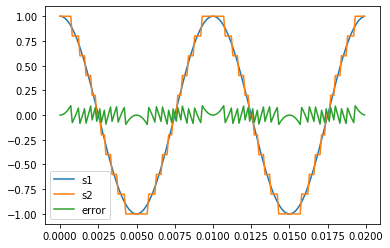

In [14]:
import numpy as np
import matplotlib.pyplot as plt

Fe = 10000
t = np.arange(0,0.02,1/Fe)
s1 = np.cos(2*np.pi*100*t)
plt.plot(t,s1,label="s1");

s2 = around(s1*5)/5
plt.plot(t,s2,label="s2")

error = s2-s1
plt.plot(t,error,label="error")
plt.legend()

q = np.max(error)-np.min(error)
print("valeur de q={}".format(q))
print("moyenne erreur={}".format(mean(error)))
print("variance erreur={:.3f} (q**2/12={:.3f})".format(var(error),q**2/12))

---
<p><span class="badge badge-danger" style="background-color:#dc3545">Quantification :</span> <span class="badge badge-info">Image</span></p>

* Modifier le nombre de bits de quantification et visualiser l'image :
    - 4 bits : $2^4=16$
    - 5 bits : $2^5=32$
    - 6 bits : $2^6=64$
    - 7 bits : $2^7=128$
    - 8 bits : $2^8=256$
    - 9 bits : $2^9=512$

In [27]:
# Quantification image
# Importation du module Image à partir de la bibliothèque PIL  
from PIL import Image  
import PIL  
  
# Création de l'object image  
im1 = Image.open(r"lenna.png")  
  
# Quantification de l'image  
im1 = im1.quantize(16)  
  
# Affichage de l'image quantifiée  
im1.show() 

---
<div class='alert alert-info'>Les documentations sont disponibles aux adresses suivantes :
    <ul>
        <li><a href="https://numpy.org/doc/1.19/">Numpy</a></li>
        <li><a href="https://docs.scipy.org/doc/scipy/reference/">Scipy</a></li>
        <li><a href="https://matplotlib.org">Matplotlib</a></li>
    </ul>
</div>

---
<a id="EXP"></a>
## Génération de séquences exponentielles

L'objectif de cet exercice est de numériser la réponse impulsionnelle d'un système du premier ordre :

$$h(t)=\frac{K}{\tau}e^{-\frac{t}{\tau}}u(t)$$

où $K$ désigne le gain statique, $\tau$ la constante de temps et $u(t)$ l'échelon unité.

La réponse impulsionnelle sera échantillonnée à la période d'échantillonnage $T_e=10$ms.

### Génération de la base temporelle

Pour synthétiser un signal numérique, il est tout d'abord nécessaire de générer la base temporelle. La base temporelle s'exprime sous la forme :

$$t=nT_e$$

où $T_e$ correspond à la période d'échantillonnage ($T_e=1/f_e$) et $n$ est un entier relatif ($n\in \mathbb{Z}$).

**Question** En utilisant la fonction `np.arange` de Numpy (voir <a href="https://numpy.org/doc/stable/reference/generated/numpy.arange.html">documentation</a>), créer un vecteur temps allant de $0$ à $0.5$s (exclu) avec une periode d'échantillonnage $T_e=10$ms.

In [6]:
import numpy as np
from scipy.signal import *
import matplotlib.pyplot as plt
from IPython.display import Audio

In [7]:
Te = 0.01
t = np.arange(0,0.5,Te)
print(t)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49]


### Numérisation du signal 

Pour synthetiser le signal numérique, nous allons évaluer $h(t)$ pour chaque valeur de $t$ comprise dans le vecteur temps `t` précédemment généré. 

**Question** En utilisant la fonction `np.exp` de Numpy (voir <a href="https://numpy.org/doc/stable/reference/generated/numpy.exp.html">documentation</a>), évaluer pour $t=nT_e$ la fonction $h(t)=\frac{K}{\tau}e^{-\frac{t}{\tau}}$ avec les paramètres $K=1$ et $\tau=0.2$s.

In [8]:
K = 1
tau = 0.2
h = (K/tau)*np.exp(-t/tau)*(t>=0)
print(h)

[5.         4.75614712 4.52418709 4.30353988 4.09365377 3.89400392
 3.7040911  3.52344045 3.35160023 3.18814076 3.0326533  2.88474905
 2.74405818 2.61022888 2.48292652 2.36183276 2.24664482 2.13707466
 2.0328483  1.93370512 1.83939721 1.74968875 1.66435542 1.58318385
 1.50597106 1.43252398 1.36265897 1.2962013  1.23298482 1.17285144
 1.1156508  1.06123987 1.00948259 0.96024954 0.91341762 0.86886972
 0.82649444 0.78618583 0.7478431  0.71137036 0.67667642 0.64367452
 0.61228214 0.58242079 0.55401579 0.52699612 0.50129422 0.47684581
 0.45358977 0.43146793]


### Affichage du signal 

Sous Python, l'affichage d'un signal numérique peut s'obtenir facilement via la librairie matplotlib. Specifiquement, nous pouvons utiliser :

* soit la fonction `plot` avec un marqueur circulaire  (voir <a href="https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.plot.html">documentation</a>),
* soit la fonction `stem` (voir <a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.stem.html">documentation</a>).

**Question** Afficher le signal $h$ pour $t=nT_e$ en utilisant la fonction `plot`avec marqueur circulaire (`o`) ou avec la fonction `stem`. Faire la représentation en fonction de $n$, puis en fonction de $nT_e$ (en s). Veiller à bien annoter l'axe des abscisses et des ordonnées avec les fonctions `xlabel` et `ylabel`

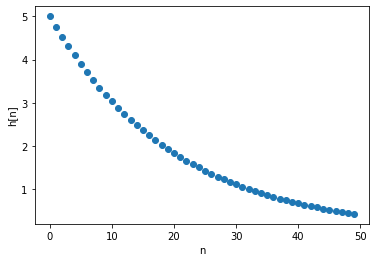

In [9]:
plt.figure()
plt.plot(h,'o')
plt.xlabel("n")
plt.ylabel("h[n]")
plt.show()

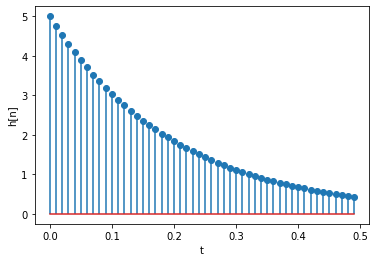

In [10]:
plt.figure()
plt.stem(t,h,'o',use_line_collection=True)
plt.xlabel("t")
plt.ylabel("h[n]")
plt;show()

## Séquences sinusoidales

Dans cet exercice, nous allons numériser puis representer un signal $x(t)$ composé de l'addition de deux sinusoides de fréquences et amplitudes respectives $f_1=200$ Hz, $a_1=1$ et $f_2=1200$ Hz, $a_2=0.2$. 

**Question** Créer une variable `x` obtenue en numérisant le signal $x(t)$ à la fréquence d'échantillonnage $\nu_e=44.1$kHz avec une base temps allant de $0$ à $0.5$s.

**Question** Représenter le signal `x` en fonction du temps pour $t$ allant de $0$ à $0.002$s (en annotant les abscisses et les ordonnées).

**Question** En utilisant la fonction `Audio` d'Ipython (voir <a href="https://ipython.org/ipython-doc/3/api/generated/IPython.display.html">documentation</a>), écouter le signal `x`.

## Séquences élémentaires : impulsion, échelon, rampe, etc

L'objectif de cet exercice est de générer et d'afficher plusieurs signaux numériques élémentaires.

In [11]:
Te = 0.01
t = np.arange(0,0.5,Te)

### Impulsion unité

Le signal impulsion unité est défini par :

$$\delta[n]=\left\{\begin{array}{cl}1 & \text{ si }n=0\\
0 & \text{ailleurs}
\end{array}\right.$$

**Question** Générer puis représenter le signal $\delta[n]$.

In [12]:
delta = 0*t
delta[0] = 1

### Echelon 

Le signal échelon est défini par :

$$u[n]=\left\{\begin{array}{cl}1 & \text{ si }n\ge 0\\
0 & \text{ailleurs}
\end{array}\right.$$

**Question** Génerer puis representer le signal $u[n]$.

### Rampe

Le signal rampe continu est défini par $r(t)=t u(t)$. 

**Question** Générer puis représenter le signal $r[n]$ obtenu à partir de la numérisation du signal $r(t)$.

### Parabole

Le signal parabole continu est défini par $p(t)=t^2$. 

**Question** Générer puis représenter le signal $p[n]$ obtenu à partir de la numérisation du signal $p(t)$.

### Carré

**Question** Générer puis représenter le signal $s[n]$ obtenu à partir de la numérisation d'un signal carré de fréquence $5$Hz. Pour générer le signal carré, vous pouvez utiliser la fonction `square` de Scipy (voir <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.square.html">documentation</a>).

---
<a id="CONV"></a>
<div>
    <p><h3>Convolution - Filtrage numérique </h3></p>
    <p><span class="badge badge-danger" style="background-color:#dc3545">SN2</span> <span class="badge badge-info">2022</span></p>
</div>

### Modélisation <a class="anchor" id="chapter2_sec2"></a>

Pour un système discret, linéaire et invariant dans le temps, la **relation entrée-sortie** peut être décrite par un **produit de convolution discret**.

<span class="badge badge-danger" style="color: #fff;background-color: #dc3545;"> Important</span>
<div class="alert alert-info">
La relation entrée-sortie est donnée par :
$$y[n]=\mathcal{T}_{\boldsymbol \theta}(x[n])=h[n]*x[n]=\sum_{l=-\infty}^{\infty}h[l]e[n-l]$$
où $h[n]=\mathcal{T}_{\boldsymbol \theta}(\delta[n])$ désigne la réponse impulsionnelle discrète du système et $$
\delta[n]=\left\{\begin{array}{cl}
1 &\text{ si }n=0\\
0 & \text{ailleurs}
\end{array}\right.
$$
</div>

### Exemple <a class="anchor" id="chapter2_sec3"></a>

Le script suivant montre comment obtenir la sortie d'un système à partir de la connaissance de son entrée `x` et de sa réponse impulsionnelle discrète `h`. Notons que ce script est présenté ici uniquement à des fin pédagogiques. En pratique,  Il est en effet fortement recommandé d'utiliser la fonction `convolve` de `numpy` dont le calcul est nettement plus optimisé.

In [22]:
def compute_output(h,x):
    y = np.zeros(len(h)+len(x)-1) # initialise output
    
    for n in range(len(y)):
        for l in range(len(h)):
            if ((n-l)>=0) and (n-l)<len(x):
                y[n] += h[l]*x[n-l]
                
    return y

Compute_output vs convolve: mean error=0.0


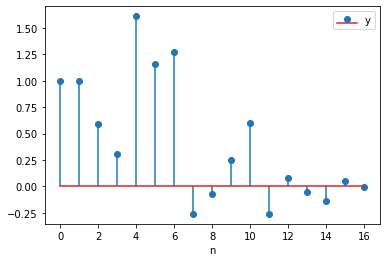

In [23]:
x = [1,0.1,-0.3,0.5,1.4,-0.5,0.1]
h = [1,0.9,0.8,0,0,0,0.5,0,0,0,-0.1]

y = compute_output(h,x)

plt.stem(y,use_line_collection=True,label='y')
plt.xlabel('n')
plt.legend()

print("Compute_output vs convolve: mean error={}".format(np.mean(y-np.convolve(h,x))))

In [7]:
from numpy import *
from scipy.stats import norm
from matplotlib.pyplot import *
from ipywidgets import interact
from numpy.fft import *

### Exercice 1 : Signal et convolution
On considère les deux réponses impulsionnelles suivantes :

\begin{align}
h_1[n]&=0.9^n,\\
h_2[n]&=(-0.9)^n,\\
\end{align}
avec $n=0,1,\cdots,50$


**Question :** Tracer les réponses impulsionnelles `h1`et `h2` sur le même graphique.

Pour générer une séquence de 51 points contenant 30 impulsions, taper : 

```
p=[ones(1,30) zeros(1,21)]
```

**Question :**  Convoluer `p` avec l’exponentielle `h1` à l’aide de la fonction `convolve`  et tracer le résultat `y_1[n]`.


<div class="alert alert-info">
La documentation de la fonction convolve est disponible à l'adresse: <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html">https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html</a>
</div>

**Question :** Convoluer `p` avec lui même, puis `h1` avec lui même aussi. Tracer les résultats. Les résultats ont-ils les mêmes formes et amplitudes que celles attendues ?

### Exercice 2 : Analyse de filtres numériques

La fonction python `y=lfilter(b,a,x)` permet de filtrer le signal `x[k]`, la sortie du filtre étant `y[k]`. Les vecteurs $b=[b_0,b_1,\cdots,b_M]$ et $a=[a_0,a_1,\cdots,a_N]$ contiennent respectivement les coefficients du numérateur et du dénominateur de la fonction de transfert du filtre suivante

\begin{align}
H(z)=\frac{\sum_{m=0}^{M} b_mz^{-m}}{\sum_{n=0}^{N} a_nz^{-n}}
\end{align}

<div class="alert alert-info">
La documentation de la fonction lfilter est disponible à l'adresse: <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html">https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html</a>
</div>

**Question :** Pour l'ensemble des filtres suivants, déterminer et tracez les caractéristiques suivantes :
* réponse impulsionnelle h ($N = 32$)
* réponse indicielle

#### Filtre 1 : $H_1(z)=0.5(1−z^{-1})$

#### Filtre 2 : $H_2(z)=0.5(1+z^{-1})$

#### Filtre 3 : $H_3(z)=0.5(1-z^{-2})$

#### Filtre 4 : $H_4(z)=\dfrac{z^{-1}}{1-z^{-2}}$

#### Filtre 5 : $H_5(z)=\dfrac{z^{-1}-0.5z^{-5}}{1-z^{-2}}$

---
### Exercice 3 : Filtre à réponse impulsionnelle finie

Un considère le signal aléatoire suivant 

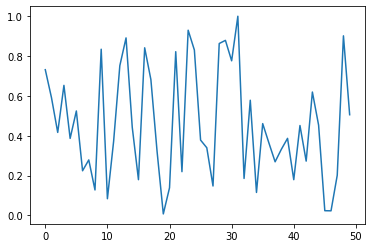

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.random.uniform(size=50)

On considère le filtre de réponse impulsionnelle :

$$h[n]=\left[\frac{1}{8},\frac{1}{4},\frac{1}{4},\frac{1}{4},\frac{1}{8}\right]$$

Ce filtre effectue une sorte de moyenne sur des ensembles de cinq échantillons consécutifs. On doit s’attendre à avoir un résultat moins “chahuté” que le signal de départ.

**Question :**  Représenter le signal d’entrée `x` et le signal filtré sur le même graphique.

---
<a id="CAN"></a>

## CAN 12 bits :

Dans un CAN 12-bits avec une tension de référence de 3.3 V, pour une tension analogique de 2.5 V, le CAN fournit la valeur :

In [18]:
int((2.5 / 3.3) * 4095) # 2**12-1=4095

3102

In [2]:
# Tension = 0.1 V
int(0.1 / 3.3 * 4095)

124

In [3]:
# Tension = 0.1001 V
int(0.1001 / 3.3 * 4095)

124

In [4]:
# Conversion Num/Analog
def adc_to_voltage(val):
    return val / 4095 * 3.3

adc_to_voltage(3102)

2.4997802197802197

In [5]:
# Conversion Analog/Num
def dac_value(volts):
    return int(volts / 3.3 * 4095)

dac_value(2.5)

3102